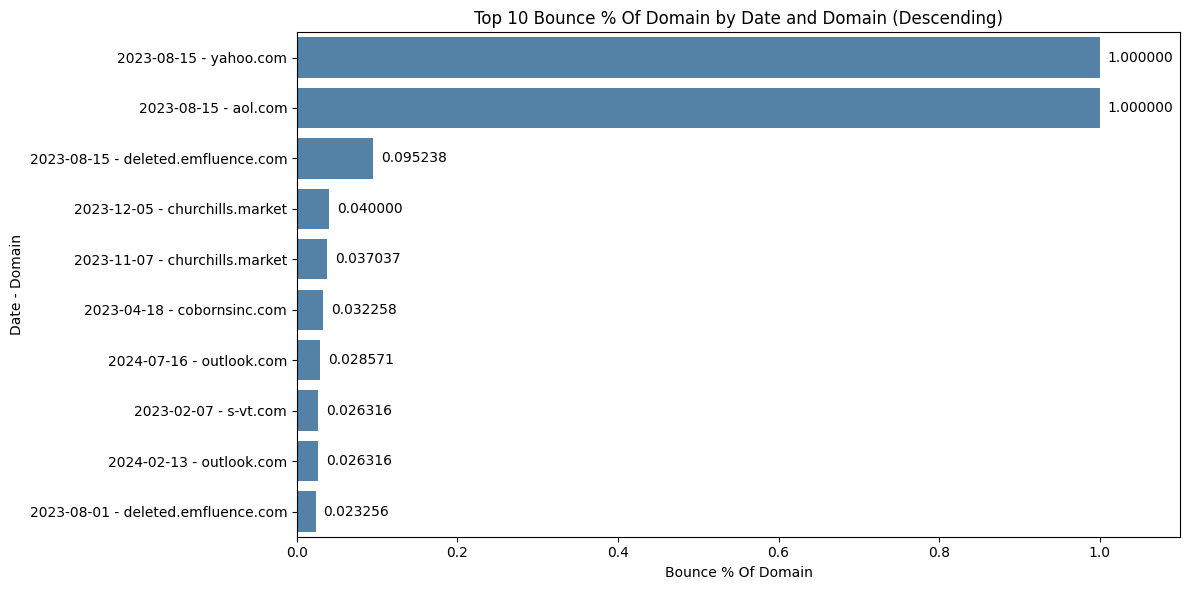

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read Excel data
file_path = '/content/2023&2024_newdomain_merged.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 2. Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 3. Select the top 10 records with the highest 'Bounce % Of Domain'
top10 = df.nlargest(10, 'Bounce % Of Domain')

# 4. Create a new column "Date - Domain" for displaying on the y-axis
top10['Date_Domain'] = top10['Date'].dt.strftime('%Y-%m-%d') + ' - ' + top10['Domain']

# 5. Sort by 'Bounce % Of Domain' in descending order
top10_sorted = top10.sort_values(by='Bounce % Of Domain', ascending=False)

# 6. Plot a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top10_sorted,
    x='Bounce % Of Domain',
    y='Date_Domain',
    color='steelblue'
)

plt.title('Top 10 Bounce % Of Domain by Date and Domain (Descending)')
plt.xlabel('Bounce % Of Domain')
plt.ylabel('Date - Domain')

# 7. Display the exact values on the right side of each bar (rounded to 6 decimal places)
for bar in ax.patches:
    width = bar.get_width()          # Get the value of each bar
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.01, y, f"{width:.6f}", va='center', ha='left')

# Set x-axis limit slightly above the max value to avoid text touching the edge
plt.xlim(0, top10_sorted['Bounce % Of Domain'].max() * 1.1)

plt.tight_layout()
plt.show()

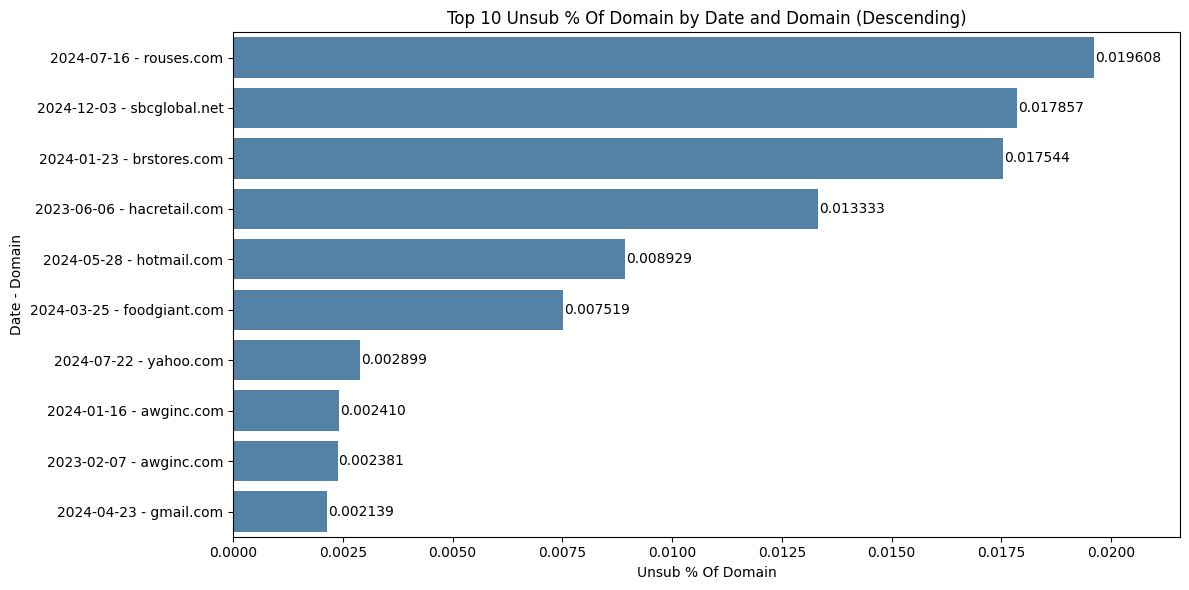

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read Excel data
file_path = '/content/2023&2024_newdomain_merged.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 2. Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 3. Select the top 10 records with the highest 'Unsub % Of Domain'
top10 = df.nlargest(10, 'Unsub % Of Domain')

# 4. Create a new column "Date - Domain" for displaying on the y-axis
top10['Date_Domain'] = top10['Date'].dt.strftime('%Y-%m-%d') + ' - ' + top10['Domain']

# 5. Sort by 'Unsub % Of Domain' in descending order
top10_sorted = top10.sort_values(by='Unsub % Of Domain', ascending=False)

# 6. Plot a horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top10_sorted,
    x='Unsub % Of Domain',
    y='Date_Domain',
    color='steelblue'
)

plt.title('Top 10 Unsub % Of Domain by Date and Domain (Descending)')
plt.xlabel('Unsub % Of Domain')
plt.ylabel('Date - Domain')

# 7. Display the exact values on the right side of each bar, tightly aligned
#    A small offset is added to prevent text from overlapping the bar edge
offset = top10_sorted['Unsub % Of Domain'].max() * 0.001

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    # (width + offset) ensures the label is close to the bar's end
    ax.text(width + offset, y, f"{width:.6f}", va='center', ha='left')

# Add extra space to the x-axis to avoid label clipping at the right edge
plt.xlim(0, top10_sorted['Unsub % Of Domain'].max() * 1.1)

plt.tight_layout()
plt.show()

<ipython-input-3-e36f4f434a78>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-3-e36f4f434a78>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


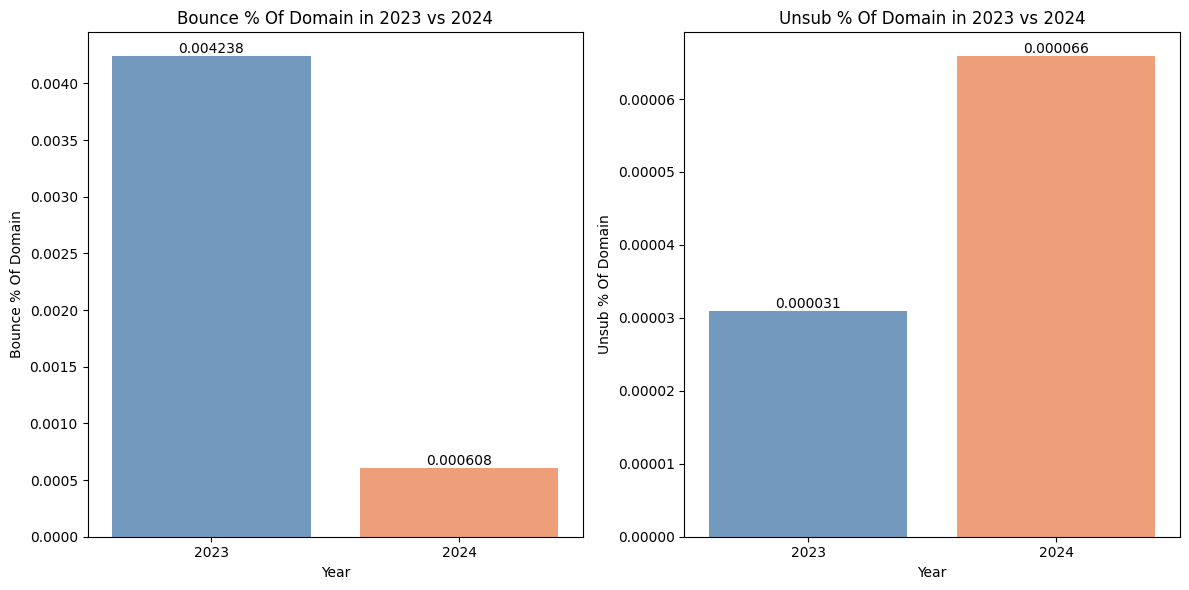

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# 1. Read Excel data
file_path = '/content/2023&2024_newdomain_merged.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 2. Convert the 'Date' column to datetime format and extract the year (as string)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year.astype(str)

# 3. Calculate the average Bounce % Of Domain and Unsub % Of Domain for each year
bounce_yearly = df.groupby('Year', as_index=False)['Bounce % Of Domain'].mean()
unsub_yearly = df.groupby('Year', as_index=False)['Unsub % Of Domain'].mean()

# 4. Plot two bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# -- Left plot: Bounce % Of Domain --
sns.barplot(
    data=bounce_yearly,
    x='Year',
    y='Bounce % Of Domain',
    ax=axes[0],
    order=['2023','2024'],          # Specify the display order
    palette=['#6699cc','#ff9966']   # Use two consistent colors
)
axes[0].set_title('Bounce % Of Domain in 2023 vs 2024')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Bounce % Of Domain')
axes[0].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
axes[0].ticklabel_format(style='plain', axis='y', useOffset=False)

# Add value labels on top of each bar
for bar in axes[0].patches:
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    axes[0].text(x, y, f"{y:.6f}", ha='center', va='bottom', color='black')

# -- Right plot: Unsub % Of Domain --
sns.barplot(
    data=unsub_yearly,
    x='Year',
    y='Unsub % Of Domain',
    ax=axes[1],
    order=['2023','2024'],          # Specify the display order
    palette=['#6699cc','#ff9966']   # Match colors with the left plot
)
axes[1].set_title('Unsub % Of Domain in 2023 vs 2024')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Unsub % Of Domain')
axes[1].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
axes[1].ticklabel_format(style='plain', axis='y', useOffset=False)

# Add value labels on top of each bar
for bar in axes[1].patches:
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    axes[1].text(x, y, f"{y:.6f}", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

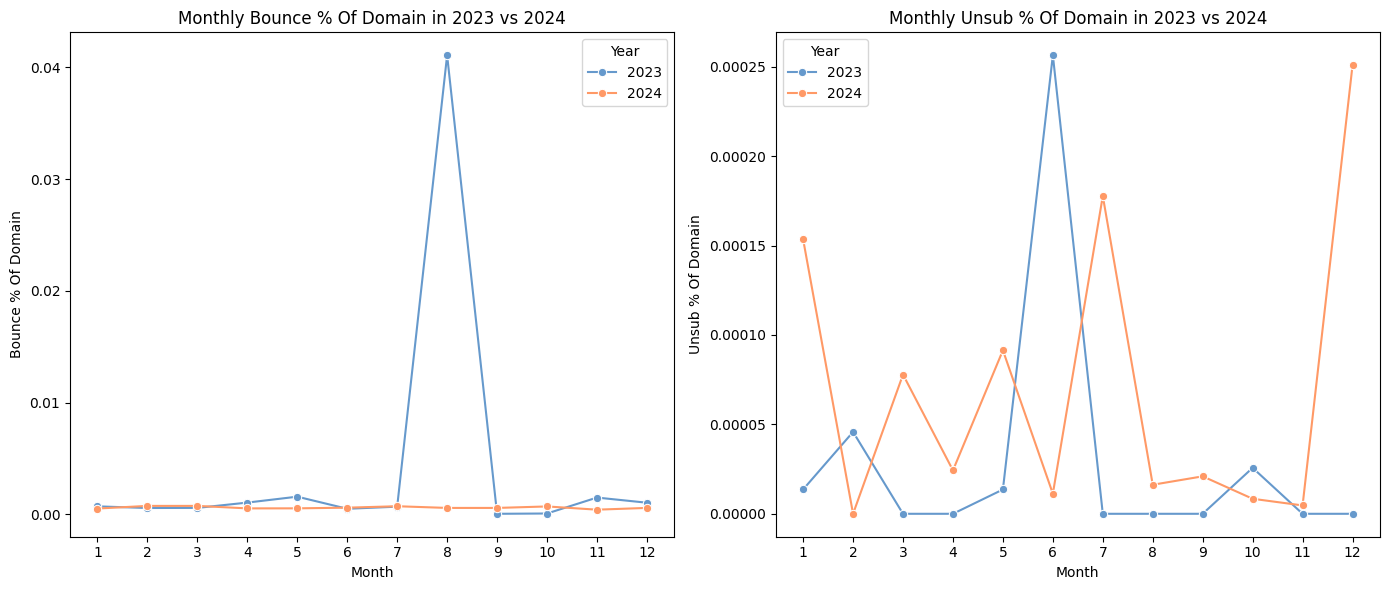

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read Excel data
file_path = '/content/2023&2024_newdomain_merged.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 2. Convert the 'Date' column to datetime format and extract year and month
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year.astype(str)  # Ensure it's treated as a categorical variable
df['Month'] = df['Date'].dt.month

# 3. Group by year and month, calculate the average Bounce % and Unsub % (raw data)
monthly = df.groupby(['Year','Month']).agg({
    'Bounce % Of Domain': 'mean',
    'Unsub % Of Domain': 'mean'
}).reset_index()

# 4. Create two subplots: left for Bounce %, right for Unsub %
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Monthly Bounce % Of Domain comparison
sns.lineplot(data=monthly, x='Month', y='Bounce % Of Domain', hue='Year',
             marker='o', palette=['#6699cc', '#ff9966'], ax=axes[0])
axes[0].set_title('Monthly Bounce % Of Domain in 2023 vs 2024')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Bounce % Of Domain')
axes[0].set_xticks(range(1, 13))

# Right plot: Monthly Unsub % Of Domain comparison
sns.lineplot(data=monthly, x='Month', y='Unsub % Of Domain', hue='Year',
             marker='o', palette=['#6699cc', '#ff9966'], ax=axes[1])
axes[1].set_title('Monthly Unsub % Of Domain in 2023 vs 2024')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Unsub % Of Domain')
axes[1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()